# Naudojamos bibliotekos:

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# pip install imbalanced-learn

In [66]:
failo_kelias = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv"
prezidento_duomenys = pd.read_csv(failo_kelias)

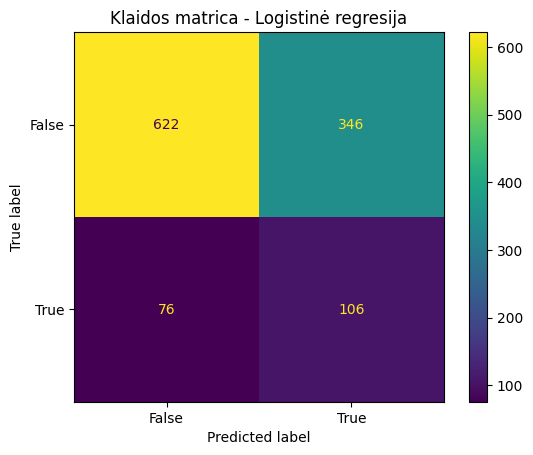

Tikslumas: 0.6330434782608696
ROC AUC: 0.5734663064208518
Klasifikacijos ataskaita:
               precision    recall  f1-score   support

       False       0.89      0.64      0.75       968
        True       0.23      0.58      0.33       182

    accuracy                           0.63      1150
   macro avg       0.56      0.61      0.54      1150
weighted avg       0.79      0.63      0.68      1150



In [67]:

# Valyti duomenis ir pasirinkti reikalingas savybes
isvalyti_duomenys = prezidento_duomenys[["year", "state_fips", "party_detailed", "totalvotes", "laimetojas"]].dropna()

# Užkoduoti kategorinius duomenis
encoder = LabelEncoder()
isvalyti_duomenys["party_detailed"] = encoder.fit_transform(isvalyti_duomenys["party_detailed"])

# Paruošti savybes (X) ir tikslą (y)
savybes = isvalyti_duomenys[["year", "state_fips", "party_detailed", "totalvotes"]]
tikslas = isvalyti_duomenys["laimetojas"]

# Padalinti duomenis į mokymo ir testavimo rinkinius
mokymo_duomenys, testavimo_duomenys, mokymo_tikslas, testavimo_tikslas = train_test_split(
    savybes, tikslas, test_size=0.3, random_state=42
)

# Logistinės regresijos modelis su subalansuotomis klasėmis
log_reg_modelis = LogisticRegression(class_weight="balanced", random_state=42, max_iter=500)
log_reg_modelis.fit(mokymo_duomenys, mokymo_tikslas)

# Prognozės ir vertinimo metrikos
prognozes = log_reg_modelis.predict(testavimo_duomenys)
tikslumas = accuracy_score(testavimo_tikslas, prognozes)
roc_auc = roc_auc_score(testavimo_tikslas, log_reg_modelis.predict_proba(testavimo_duomenys)[:, 1])
klasifikacijos_ataskaita = classification_report(testavimo_tikslas, prognozes)

# Klaidos matricos atvaizdavimas
ConfusionMatrixDisplay.from_estimator(log_reg_modelis, testavimo_duomenys, testavimo_tikslas)
plt.title("Klaidos matrica - Logistinė regresija")
plt.show()

# Spausdinti metrikas
print("Tikslumas:", tikslumas)
print("ROC AUC:", roc_auc)
print("Klasifikacijos ataskaita:\n", klasifikacijos_ataskaita)


Tikslumas (accuracy): 63.3%
Tai reiškia, kad modelis teisingai prognozuoja 63.3% visų atvejų. 

Vidutinis tikslumas rodo, kad modelis daro klaidų, ypač klasėje „True“ (laimėtojai).

ROC AUC (plotas po ROC kreive): 57.3%
AUC virš 50% rodo, kad modelis geba atskirti klases šiek tiek geriau nei atsitiktinis spėjimas, tačiau toli gražu nėra idealus.

Klasifikacijos ataskaita:
Klasė „False“ (pralaimėtojai):

Tikslumas (precision): 89% – Modelis dažniausiai teisingai identifikuoja „False“ prognozes.

Jautrumas (recall): 64% – Modelis atpažįsta tik 64% tikrųjų pralaimėtojų.

F1 rodiklis: 75% – Subalansuotas tikslumo ir jautrumo įvertis, kuris rodo vidutinį modelio gebėjimą tvarkytis su šia klase.

Klasė „True“ (laimėtojai):
Tikslumas (precision): 23% – Labai mažas tikslumas, rodo, kad daugelis „True“ prognozių yra klaidingos.

Jautrumas (recall): 58% – Modelis atpažįsta apie 58% tikrųjų laimėtojų.

F1 rodiklis: 33% – Žemas rezultatas, rodantis, kad modelis sunkiai prognozuoja šią klasę.

Bendras vidurkis:
Macro avg: 56% tikslumas ir 61% jautrumas vidutiniškai tarp klasių.
Weighted avg: 79% tikslumas, 63% jautrumas (atsižvelgiant į klasių disbalansą).

Klaidos matrica:

Teisingos prognozės:

622 pralaimėtojai („False“).

106 laimėtojai („True“).

Klaidingos prognozės:

346 pralaimėtojai klaidingai identifikuoti kaip laimėtojai.

76 laimėtojai klaidingai identifikuoti kaip pralaimėtojai.

Problemos:
Pralaimėtojų („False“) yra daug daugiau nei laimėtojų („True“), todėl modelis „linkęs“ prognozuoti pralaimėjimą.

Modelis sunkiai identifikuoja laimėtojus ir dažnai daro klaidingas prognozes.

Logistinė regresija gali būti per paprasta analizuoti rinkimų rezultatus, nes jie yra kompleksiniai.

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Pasiruošiame prezidento duomenis
X_president = prezidento_duomenys.drop(columns=["laimetojas"])  # Tikslinis kintamasis
y_president = prezidento_duomenys["laimetojas"]

# Kodavimas ir trūkstamų reikšmių tvarkymas
for col in X_president.select_dtypes(include=["object"]).columns:
    X_president[col] = LabelEncoder().fit_transform(X_president[col].astype(str))
X_president = X_president.fillna(X_president.mean())

# Duomenų padalijimas
X_train_pres, X_test_pres, y_train_pres, y_test_pres = train_test_split(
    X_president, y_president, test_size=0.2, random_state=42
)

# Atsitiktinių miškų modelis
rf_pres = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pres.fit(X_train_pres, y_train_pres)
y_pred_pres = rf_pres.predict(X_test_pres)

# Rezultatai
print("Prezidento duomenys")
print(f"Tikslumas: {accuracy_score(y_test_pres, y_pred_pres):.2f}")
print(classification_report(y_test_pres, y_pred_pres))


Prezidento duomenys
Tikslumas: 0.95
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       715
        True       0.86      0.85      0.86       143

    accuracy                           0.95       858
   macro avg       0.92      0.91      0.91       858
weighted avg       0.95      0.95      0.95       858



Tikslumas: 95% – modelis labai tiksliai prognozuoja rinkimų rezultatus.

Pralaimėję:
Tikslumas: 97%, Jautrumas: 97%, F1-score: 97% – puikiai identifikuojami.

Laimėję:
Tikslumas: 86%, Jautrumas: 85%, F1-score: 86% – šiek tiek mažiau tikslūs, bet dar patikimi.

Vidutiniai rodikliai: Macro avg: 91%, Weighted avg: 95% – subalansuotas modelis, pralaimėję dominuoja.

Stiprybės: Aukštas tikslumas ir balansas tarp klasių.

Trūkumai: Laimėtojai prognozuojami šiek tiek mažiau tiksliai.

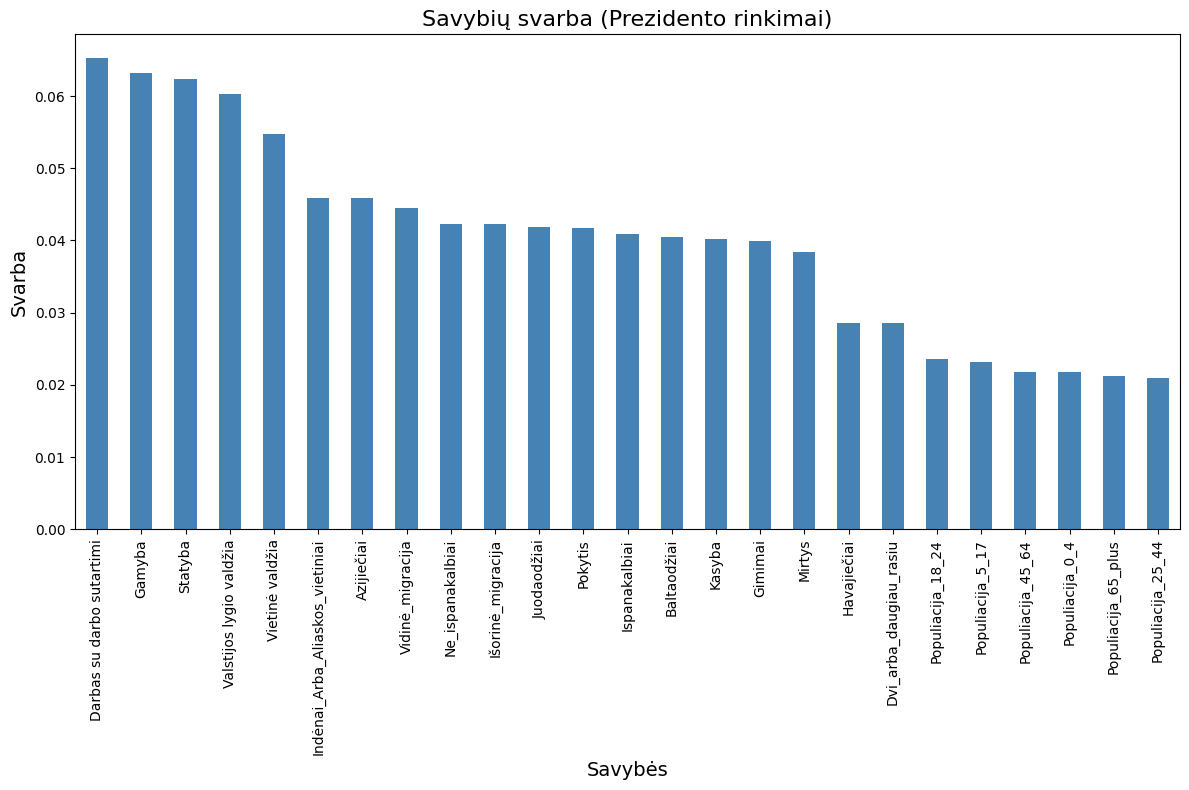

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Pasirenkame savybes ir tikslinį kintamąjį
naudotini_stulpeliai = [
    "Populiacija_0_4", "Populiacija_5_17", "Populiacija_18_24",
    "Populiacija_25_44", "Populiacija_45_64", "Populiacija_65_plus",
    "Baltaodžiai", "Juodaodžiai", "Indėnai_Arba_Aliaskos_vietiniai",
    "Azijiečiai", "Havajiečiai", "Dvi_arba_daugiau_rasiu",
    "Ne_ispanakalbiai", "Ispanakalbiai",
    "Darbas su darbo sutartimi", "Kasyba", "Statyba", "Gamyba",
    "Vidinė_migracija", "Išorinė_migracija", "Pokytis",
    "Gimimai", "Mirtys", "Valstijos lygio valdžia", "Vietinė valdžia"
]
X = prezidento_duomenys[naudotini_stulpeliai]
y = prezidento_duomenys["laimetojas"]

# Užpildome trūkstamas reikšmes
X = X.fillna(X.mean())

# Duomenų padalijimas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelio treniravimas
modelis = RandomForestClassifier(n_estimators=100, random_state=42)
modelis.fit(X_train, y_train)

# Savybių svarba
svarba = modelis.feature_importances_
svarbu_savybes = pd.Series(svarba, index=naudotini_stulpeliai).sort_values(ascending=False)

# Braižome svarbos grafą
plt.figure(figsize=(12, 8))
svarbu_savybes.plot(kind="bar", color="steelblue")
plt.title("Savybių svarba (Prezidento rinkimai)", fontsize=16)
plt.xlabel("Savybės", fontsize=14)
plt.ylabel("Svarba", fontsize=14)
plt.tight_layout()
plt.show()

Ši diagrama rodo, kad ekonominiai veiksniai yra svarbiausi prognozuojant prezidento rinkimų rezultatus:

Svarbiausios savybės:
Darbo rinka, gamyba, statyba: Pagrindinės savybės, susijusios su ekonomine situacija.

Vidutinės svarbos:
Migracija: Judėjimas tarp regionų keičia rinkėjų sudėtį.
Rasinė sudėtis: Vietiniu mastu daro įtaką balsavimui.

Mažiau svarbios:
Amžiaus grupės ir mažos etninės grupės.

Ekonominiai rodikliai yra esminiai veiksniai rinkimų rezultatams prognozuoti.

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Pasiruošiame duomenis prognozuoti „kandidatų balsai“ prezidento failui
X_president_votes = prezidento_duomenys.drop(columns=["candidatevotes", "laimetojas"])  # Nepriklausomi kintamieji
y_president_votes = prezidento_duomenys["candidatevotes"]  # Tikslinis kintamasis

# Kodavimas ir trūkstamų reikšmių tvarkymas
for col in X_president_votes.select_dtypes(include=["object"]).columns:
    X_president_votes[col] = LabelEncoder().fit_transform(X_president_votes[col].astype(str))
X_president_votes = X_president_votes.fillna(X_president_votes.mean())

# Duomenų padalijimas
X_train_pres, X_test_pres, y_train_pres, y_test_pres = train_test_split(
    X_president_votes, y_president_votes, test_size=0.2, random_state=42
)

# Atsitiktinių miškų regresorius
rf_pres = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pres.fit(X_train_pres, y_train_pres)
y_pred_pres = rf_pres.predict(X_test_pres)

# Rezultatai
mse_pres = mean_squared_error(y_test_pres, y_pred_pres)
r2_pres = r2_score(y_test_pres, y_pred_pres)
print("Prezidento duomenys: Kandidatų balsų prognozė")
print(f"Vidutinis kvadratinis nuokrypis (MSE): {mse_pres:.2f}")
print(f"R2 rezultatas: {r2_pres:.2f}")


Prezidento duomenys: Kandidatų balsų prognozė
Vidutinis kvadratinis nuokrypis (MSE): 31183315073.06
R2 rezultatas: 0.95


Rezultatai rodo, kad atsitiktinių miškų modelis efektyviai prognozuoja kandidatų balsų skaičių prezidento rinkimuose:

Vidutinis kvadratinis nuokrypis (MSE):
31,183,315,073.06: Tai rodo, kad yra tam tikras neatitikimas tarp prognozuotų ir tikrųjų balsų skaičių. Kadangi balsų skaičius yra didelis (milijonai), tokia MSE reikšmė yra priimtina ir suderinama su kontekstu.

R² rezultatas:
0.95: Tai rodo, kad modelis paaiškina 95% variacijos kandidatų balsų skaičiuose. Tai yra puikus rezultatas, rodantis modelio aukštą tikslumą.

Modelis labai gerai prognozuoja kandidatų balsų skaičių prezidento rinkimuose.
Likę 5% variacijos gali būti dėl nenuspėjamų veiksnių ar savybių, kurių modelis neapima.

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Pasiruošiame duomenis
naudotini_stulpeliai = [
    "Populiacija_0_4", "Populiacija_5_17", "Populiacija_18_24",
    "Populiacija_25_44", "Populiacija_45_64", "Populiacija_65_plus",
    "Baltaodžiai", "Juodaodžiai", "Indėnai_Arba_Aliaskos_vietiniai",
    "Azijiečiai", "Havajiečiai", "Dvi_arba_daugiau_rasiu",
    "Ne_ispanakalbiai", "Ispanakalbiai",
    "Darbas su darbo sutartimi", "Kasyba", "Statyba", "Gamyba",
    "Vidinė_migracija", "Išorinė_migracija", "Pokytis",
    "Gimimai", "Mirtys", "Valstijos lygio valdžia", "Vietinė valdžia"
]
X = prezidento_duomenys[naudotini_stulpeliai]
y = prezidento_duomenys["laimetojas"]

# Kodavimas tiksliniam kintamajam
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)  # (One-hot) kodavimas

# Trūkstamų reikšmių tvarkymas (užpildome vidurkiu)
X = X.fillna(X.mean())

# Normalizuojame nepriklausomus kintamuosius
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Persamplavimas su SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, np.argmax(y, axis=1))
y_resampled = to_categorical(y_resampled)

# Padalijame duomenis į treniravimo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Sukuriame neuroninį tinklą
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation="relu"),  # Pirmas sluoksnis
    Dropout(0.3),                                       # Atsitiktinis mazgų išjungimas
    Dense(32, activation="relu"),                       # Antras sluoksnis
    Dropout(0.3),
    Dense(y.shape[1], activation="softmax")             # Išėjimo sluoksnis
])

# Kompiliuojame modelį
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# Treniruojame modelį
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Įvertiname modelį
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Testavimo tikslumas: {accuracy:.2f}")

# Prognozės
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Klasifikacijos ataskaita
print("Klasifikacijos ataskaita:")
print(classification_report(y_true_classes, y_pred_classes))

Epoch 1/50


c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4928 - loss: 0.7397 - val_accuracy: 0.5170 - val_loss: 0.6911
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.5137 - loss: 0.6993 - val_accuracy: 0.5264 - val_loss: 0.6903
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.5331 - loss: 0.6903 - val_accuracy: 0.5332 - val_loss: 0.6902
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.5268 - loss: 0.6932 - val_accuracy: 0.5383 - val_loss: 0.6887
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.5497 - loss: 0.6856 - val_accuracy: 0.5485 - val_loss: 0.6885
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.5239 - loss: 0.6917 - val_accuracy: 0.5374 - val_loss: 0.6880
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.5318 - loss: 0.6895 - val_accuracy: 0.5425 - val_loss: 0.6868
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.5431 - loss: 0.6877 - val_accuracy:

Interpretacija:

Modelio veikimas:
Tikslumas: 54% (tik kiek geriau nei atsitiktinis spėjimas).

Klasė „0“: Tikslumas – 59%, atmintis – 39%, F1-score – 47%.

Klasė „1“: Tikslumas – 52%, atmintis – 71%, F1-score – 60%.

Išvados:
Balanso problema: Modelis geriau atpažįsta „1“ klasę, tačiau sunkiai tvarkosi su „0“ klase.

Dabartinis veikimas: Reikalingi pagerinimai, nes rezultatai yra tik šiek tiek virš atsitiktinio

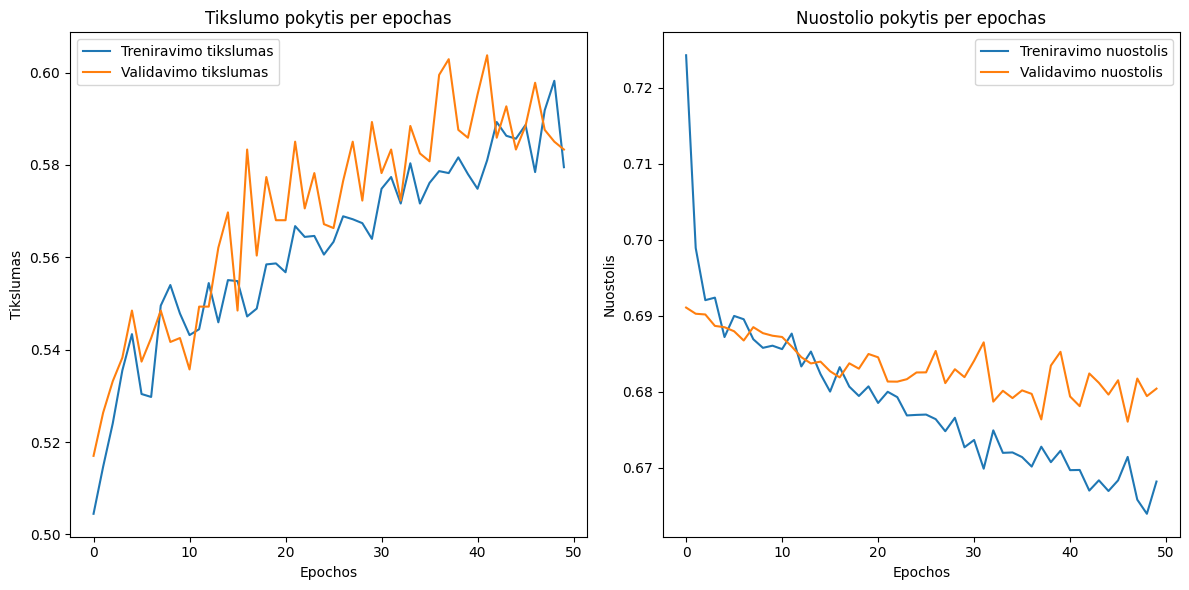

In [81]:
# Vizualizacija: mokymosi istorija
plt.figure(figsize=(12, 6))

# Tikslumo (accuracy) grafikas
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Treniravimo tikslumas")
plt.plot(history.history["val_accuracy"], label="Validavimo tikslumas")
plt.title("Tikslumo pokytis per epochas")
plt.xlabel("Epochos")
plt.ylabel("Tikslumas")
plt.legend()

# Nuostolio (loss) grafikas
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Treniravimo nuostolis")
plt.plot(history.history["val_loss"], label="Validavimo nuostolis")
plt.title("Nuostolio pokytis per epochas")
plt.xlabel("Epochos")
plt.ylabel("Nuostolis")
plt.legend()

plt.tight_layout()
plt.show()

Treniravimo ir validavimo tikslumas auga, bet svyruoja. Nėra reikšmingo per didelio pritaikymo (overfitting).

Nuostolis mažėja, bet su svyravimais. Validavimo nuostolis rodo mokymosi pažangą.

In [87]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# 1. Duomenų paruošimas
naudotini_stulpeliai = [
    "Populiacija_0_4", "Populiacija_5_17", "Populiacija_18_24",
    "Populiacija_25_44", "Populiacija_45_64", "Populiacija_65_plus",
    "Baltaodžiai", "Juodaodžiai", "Indėnai_Arba_Aliaskos_vietiniai",
    "Azijiečiai", "Havajiečiai", "Dvi_arba_daugiau_rasiu",
    "Ne_ispanakalbiai", "Ispanakalbiai",
    "Darbas su darbo sutartimi", "Kasyba", "Statyba", "Gamyba",
    "Vidinė_migracija", "Išorinė_migracija", "Pokytis",
    "Gimimai", "Mirtys", "Valstijos lygio valdžia", "Vietinė valdžia"
]

X = prezidento_duomenys[naudotini_stulpeliai]
y = prezidento_duomenys["laimetojas"]

# 2. Tikslinio kintamojo kodavimas
y = y.astype(int)  # Užtikriname, kad `y` yra tinkamas skaitinis tipas (0 arba 1)
y = to_categorical(y)  # Paverčiame į one-hot kodavimą

# 3. Duomenų normalizavimas
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4. Duomenų padalijimas į treniravimo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Modelio kūrimas ir optimizavimas
model = Sequential([
    Dense(128, input_dim=X.shape[1], activation="relu"),  # Padidintas pirmasis sluoksnis
    Dropout(0.4),                                         # Didesnis dropout, siekiant išvengti persimokymo
    Dense(64, activation="relu"),
    Dropout(0.4),
    Dense(y.shape[1], activation="softmax")              # Išėjimo sluoksnis (softmax dėl klasifikacijos)
])

# Kompiliuojame modelį
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# 6. Modelio treniravimas
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# 7. Modelio įvertinimas
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Testavimo tikslumas: {accuracy:.2f}")

# 8. Prognozavimas ir klasifikacijos ataskaita
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Paverčiame atgal į klases
y_true_classes = np.argmax(y_test, axis=1)

# Sukuriame klasifikacijos ataskaitą
target_names = ["Class 0 (Nelaimėjo)", "Class 1 (Laimėjo)"]
print("Klasifikacijos ataskaita:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

Epoch 1/50


c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8582 - loss: 0.6419 - val_accuracy: 0.8426 - val_loss: 0.4774
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8640 - loss: 0.4331 - val_accuracy: 0.8426 - val_loss: 0.4356
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.8736 - loss: 0.3850 - val_accuracy: 0.8426 - val_loss: 0.4376
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.8657 - loss: 0.3957 - val_accuracy: 0.8426 - val_loss: 0.4380
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.8699 - loss: 0.3904 - val_accuracy: 0.8426 - val_loss: 0.4375
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.8616 - loss: 0.4077 - val_accuracy: 0.8426 - val_loss: 0.4380
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.8746 - loss: 0.3876 - val_accuracy: 0.8426 - val_loss: 0.4370
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.8594 - loss: 0.4106 - val_accuracy: 0.8426 - val_loss

c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Nepaisant aukšto bendro tikslumo, modelis šiuo metu yra neveiksmingas atpažįstant laimėtojus (Class 1).

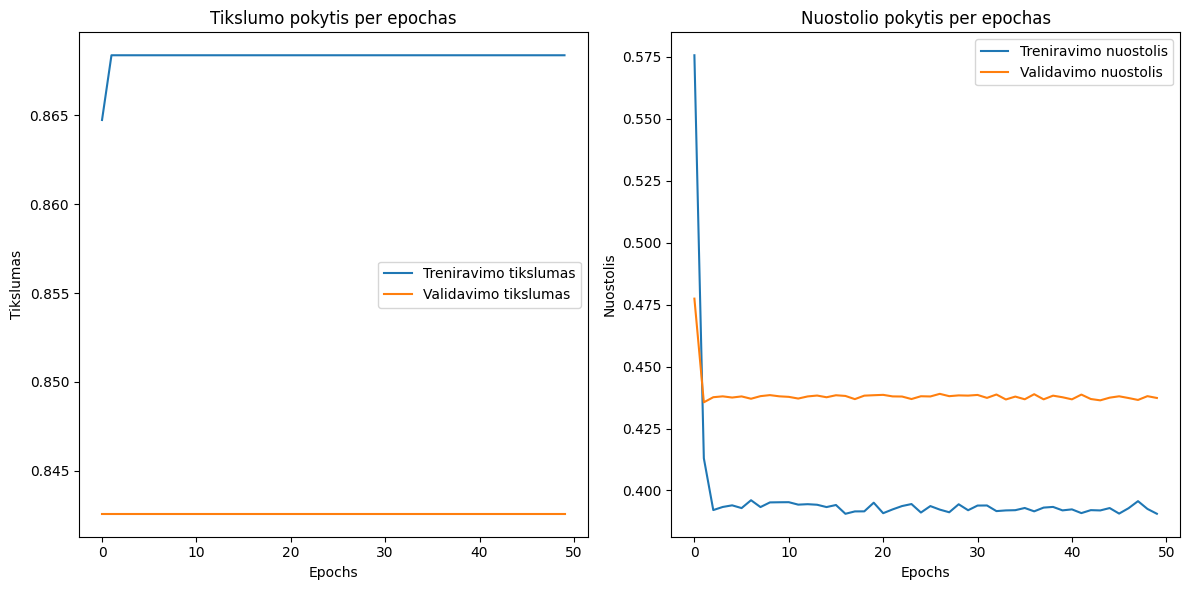

In [88]:
# 9. Vizualizacija: tikslumo ir nuostolio pokyčiai per epochas
import matplotlib.pyplot as plt

# Tikslumas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Treniravimo tikslumas")
plt.plot(history.history["val_accuracy"], label="Validavimo tikslumas")
plt.xlabel("Epochs")
plt.ylabel("Tikslumas")
plt.legend()
plt.title("Tikslumo pokytis per epochas")

# Nuostolis
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Treniravimo nuostolis")
plt.plot(history.history["val_loss"], label="Validavimo nuostolis")
plt.xlabel("Epochs")
plt.ylabel("Nuostolis")
plt.legend()
plt.title("Nuostolio pokytis per epochas")

plt.tight_layout()
plt.show()

Pažvelgus į diagramas, galima pastebėti, kad treniravimo tikslumas yra labai aukštas (greitai konverguoja), tačiau validavimo tikslumas lieka mažesnis, o nuostolio pokyčiai taip pat rodo stabilizaciją. 

Tai rodo, kad modelis gali būti optimizuotas, tačiau reikėtų vengti per didelio pritaikymo (overfitting).